In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [33]:
table = 'Datasets/PKS/2022/Räumliche-Gliederung/Bund/BU-T01-Faelle.csv'
df = pd.read_csv(table,sep=';',encoding=' iso8859-1',skiprows=1,thousands=',',decimal='.')
int_cols = np.array([2,4,6,7,8,9,10,11,12,13,15,16,17,18])
flt_cols = np.array([3,5,19])
df.iloc[:, int_cols] = df.iloc[:, int_cols].astype(int)
df.iloc[:, flt_cols] = df.iloc[:, flt_cols].astype(float)
summary = df.iloc[0,2:]
df = df.drop(0).reset_index(drop=True)
print(summary.iloc[int_cols-2].rename('Gesamt').head().to_markdown())
print(df.iloc[:,int_cols].sum(axis=0).rename('check').head().to_markdown())
print(summary.iloc[flt_cols-2].rename('Gesamt').head().to_markdown())
print(df.iloc[:,flt_cols].mean(axis=0).rename('check').head().to_markdown())
df.head()

|                                                    |           Gesamt |
|:---------------------------------------------------|-----------------:|
| Anzahl erfasste Faelle                             |      5.62858e+06 |
| erfasste Faelle, davon Versuche Anzahl             | 414197           |
| Tatortverteilung bis unter 20000 Einwohner         |      1.3049e+06  |
| Tatortverteilung 20000 bis unter 100000 Einwohner  |      1.50873e+06 |
| Tatortverteilung 100000 bis unter 500000 Einwohner |      1.09942e+06 |
|                                                    |       check |
|:---------------------------------------------------|------------:|
| Anzahl erfasste Faelle                             | 3.49399e+07 |
| erfasste Faelle, davon Versuche Anzahl             | 2.53931e+06 |
| Tatortverteilung bis unter 20000 Einwohner         | 7.91276e+06 |
| Tatortverteilung 20000 bis unter 100000 Einwohner  | 9.33572e+06 |
| Tatortverteilung 100000 bis unter 500000 Einwohner | 6.88144e+06 |

,Schluessel,Straftat,Anzahl erfasste Faelle,%-Anteil an allen Faellen,"erfasste Faelle, davon Versuche Anzahl","erfasste Faelle, davon Versuche in %",Tatortverteilung bis unter 20000 Einwohner,Tatortverteilung 20000 bis unter 100000 Einwohner,Tatortverteilung 100000 bis unter 500000 Einwohner,Tatortverteilung 500000 und mehr Einwohner,Tatortverteilung unbekannt,mit Schusswaffe gedroht,mit Schusswaffe geschossen,Aufklaerung - Anzahl Faelle,Aufklaerung in % (Aufklaerungsquote),Tatverdaechtige insgesamt,Tatverdaechtige maennlich,Tatverdaechtige weiblich,Anzahl nichtdeutsche Tatverdaechtige,Anteil nichtdeutsche Tatverdaechtige an Gesamtzahl in %
0,0,Straftaten gegen das Leben,3077,0.1,1770,57.5,887,974,566,635,15,8,133,2732,88.8,3539,2950,589,1270,35.9
1,10000,Mord § 211 StGB,662,0.0,451,68.1,205,160,122,166,9,3,59,604,91.2,763,654,109,293,38.4
2,10079,Sonstiger Mord,625,0.0,425,68.0,192,155,114,155,9,3,55,570,91.2,711,604,107,269,37.8
3,11000,Mord im Zusammenhang mit Raubdelikten,29,0.0,23,79.3,11,4,6,8,0,0,4,26,89.7,46,44,2,23,50.0
4,12000,Mord im Zusammenhang mit Sexualdelikten,8,0.0,3,37.5,2,1,2,3,0,0,0,8,100.0,8,8,0,2,25.0


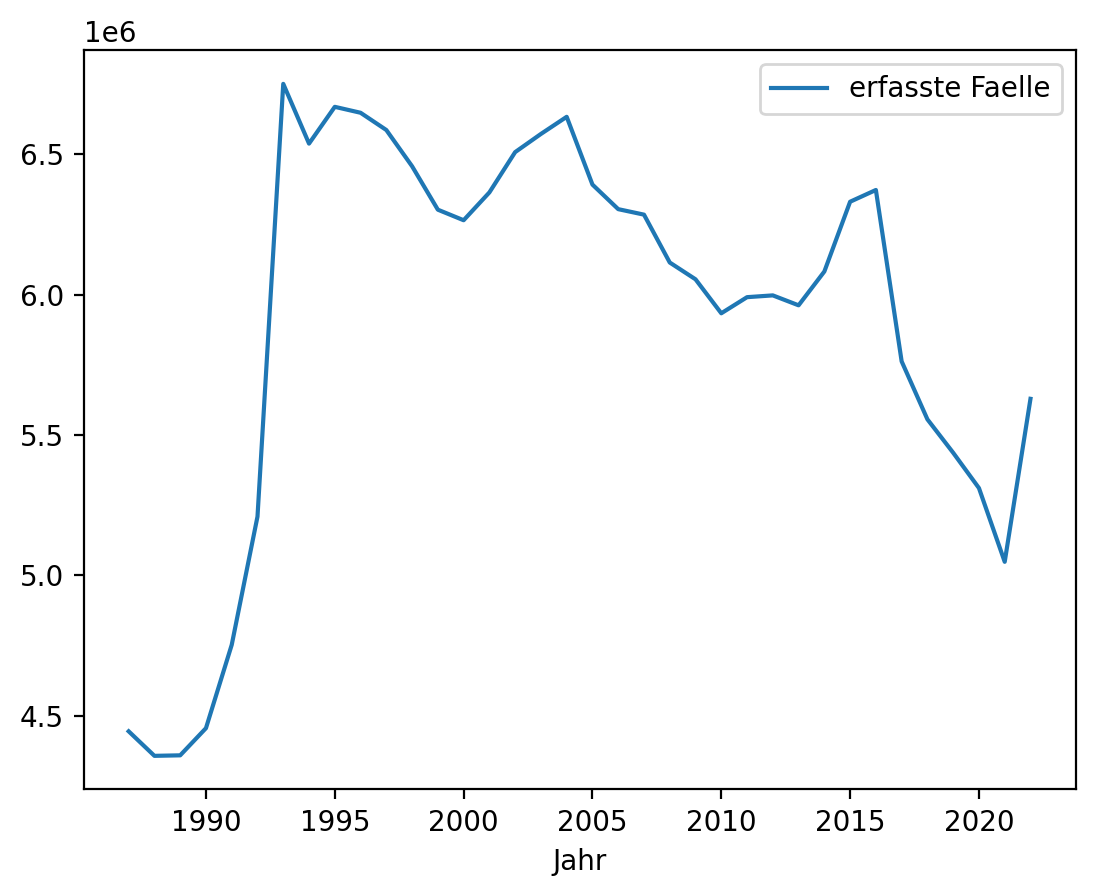

In [54]:
yearly_table = 'Datasets/PKS/2022/Zeitliche-Gliederung/T01-Faelle.csv'
df = pd.read_csv(yearly_table,sep=';',encoding=' iso8859-1',skiprows=1,thousands=',',decimal='.')
total = df[df.Straftat == 'Straftaten insgesamt']
total.plot(x='Jahr',y='erfasste Faelle')
plt.show()

# More CSV Problems
Missing trailing zeros...

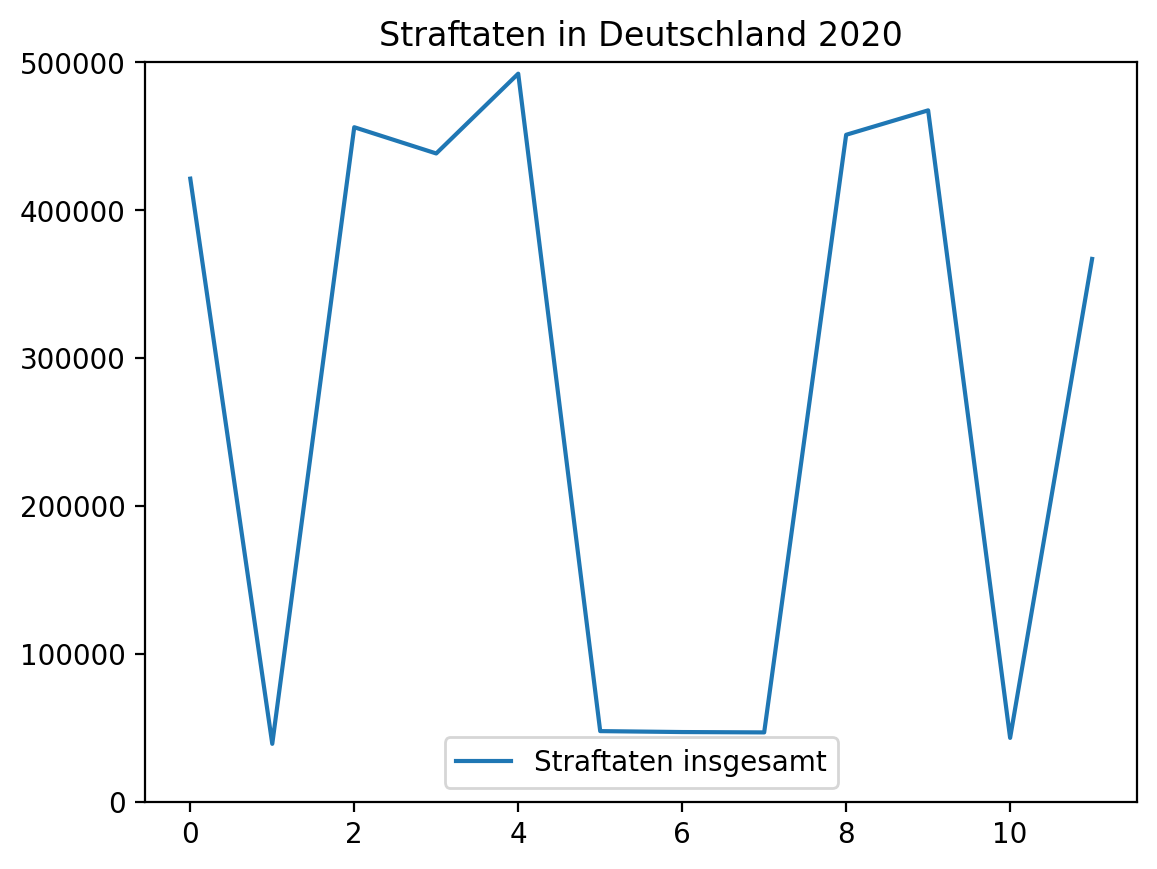

,Monat,Straftaten insgesamt
0,Tatmonat in 2020-Januar,421337
1,Tatmonat in 2020-Februar,39052
2,Tatmonat in 2020-Maerz,456125
3,Tatmonat in 2020-April,438373
4,Tatmonat in 2020-Mai,492336
5,Tatmonat in 2020-Juni,47646
6,Tatmonat in 2020-Juli,47017
7,Tatmonat in 2020-August,46776
8,Tatmonat in 2020-September,451006
9,Tatmonat in 2020-Oktober,467533


In [51]:
monthly_table = 'Datasets/PKS/2022/Räumliche-Gliederung/Bund/BU-T08-Tatzeit.csv'
df = pd.read_csv(monthly_table,sep=';',encoding=' iso8859-1',skiprows=1,thousands=',',decimal='.')
total = df[df.Straftat == 'Straftaten insgesamt']
total = pd.melt(total.iloc[:,3:-3],var_name='Monat',value_name='Straftaten insgesamt')
ax = total.plot()
plt.title('Straftaten in Deutschland 2020')
ax.set_ylim(0,5e5)
plt.show()
total

,Monat,Straftaten insgesamt
0,Jan.,421337
1,Febr.,390520
2,März,456125
3,April,438373
4,Mai,492336
5,Juni,476460
6,Juli,470170
7,Aug.,467760
8,Sept.,451006
9,Okt.,467533


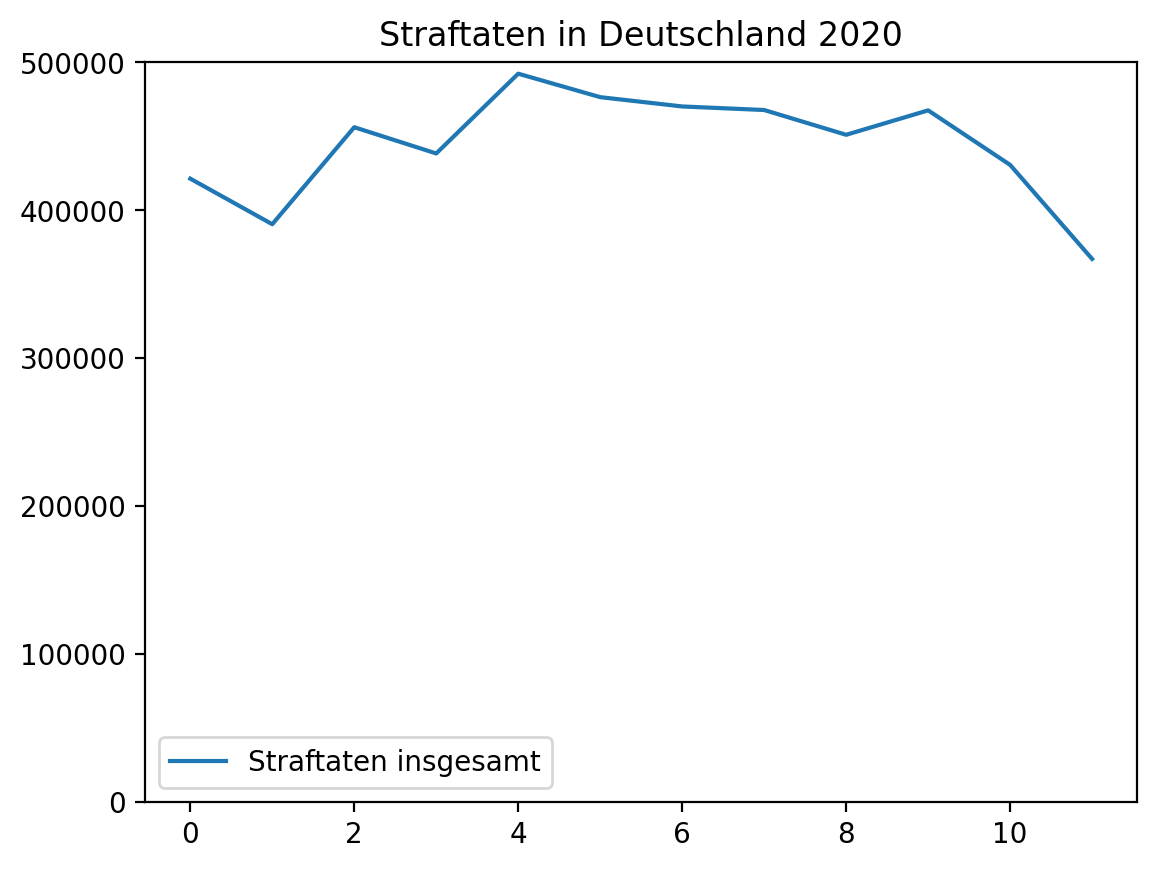

In [69]:
monthly_table = 'Datasets/PKS/2022/Räumliche-Gliederung/Bund/BU-T08-Tatzeit.xlsx'
df = pd.read_excel(monthly_table,skiprows=4,thousands=',',decimal='.')
df.columns.values[3:15] = df.iloc[0,3:15]
df = df.drop([0,1]).reset_index(drop=True)
total = df[df.Straftat == 'Straftaten insgesamt']
total = pd.melt(total.iloc[:,3:-3],var_name='Monat',value_name='Straftaten insgesamt')
ax = total.plot()
plt.title('Straftaten in Deutschland 2020')
ax.set_ylim(0,5e5)
total